### Recurrent neural network:
#### The state of the recurring neural network at time t, is a function of its old state at time t-1 and the input at time t :  $S_{t}$ = $f_{w}(S_{t-1},x_{t})$

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

#For Feature scaling
from sklearn.preprocessing import MinMaxScaler

#For defining the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Define path to the training and testing datasets

In [79]:
pathToTrainingDataset = "D:\\Learning\\DeepLearning\\Project-CoronaVirusOutbreak\\Datasets\\WorldwideCoronaCasesEachDay-TrainDataset.csv"
pathToTestingDataset = "D:\\Learning\\DeepLearning\\Project-CoronaVirusOutbreak\\Datasets\\WorldwideCoronaCasesEachDay-TestDataset.csv"

### Load the file into a dataset object

In [80]:
trainDataSet = pd.read_csv(pathToTrainingDataset, parse_dates=['Date'], index_col= ['Date'])
testDataSet = pd.read_csv(pathToTestingDataset, parse_dates=['Date'], index_col= ['Date'])

### Analyse the training and testing datasets

In [81]:
print('\ntrainDataSet.shape: ',trainDataSet.shape)
print('\ntestDataSet.shape: ',testDataSet.shape)


trainDataSet.shape:  (38, 1)

testDataSet.shape:  (22, 1)


In [82]:
trainDataSet.head()

,Total number of confirmed cases
Date,
2020-01-20,282
2020-01-21,314
2020-01-23,581
2020-01-24,846
2020-01-25,1320


In [83]:
testDataSet.head()

,Total number of confirmed cases
Date,
2020-02-28,83652
2020-02-29,85403
2020-03-01,87137
2020-03-02,88948
2020-03-03,90869


### Visualizer the training dataset

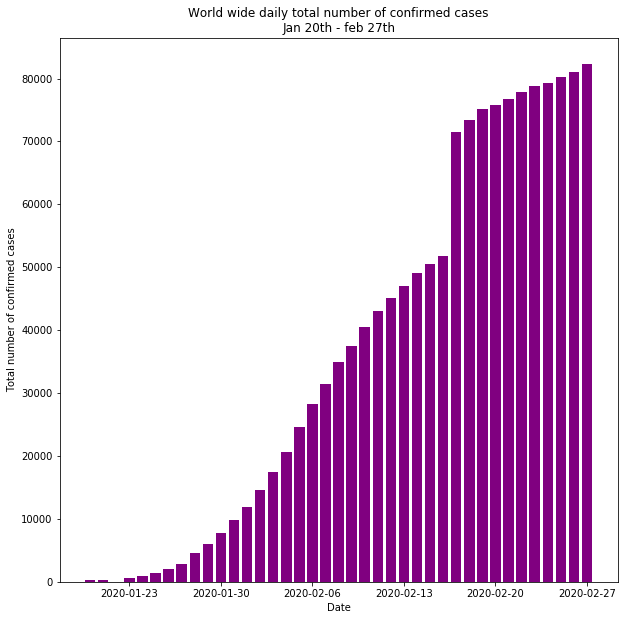

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
# Add x-axis and y-axis
ax.bar(trainDataSet.index.values,
       trainDataSet['Total number of confirmed cases'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Total number of confirmed cases",
       title="World wide daily total number of confirmed cases\nJan 20th - feb 27th")
plt.show()

### Visualizer the testing datasets

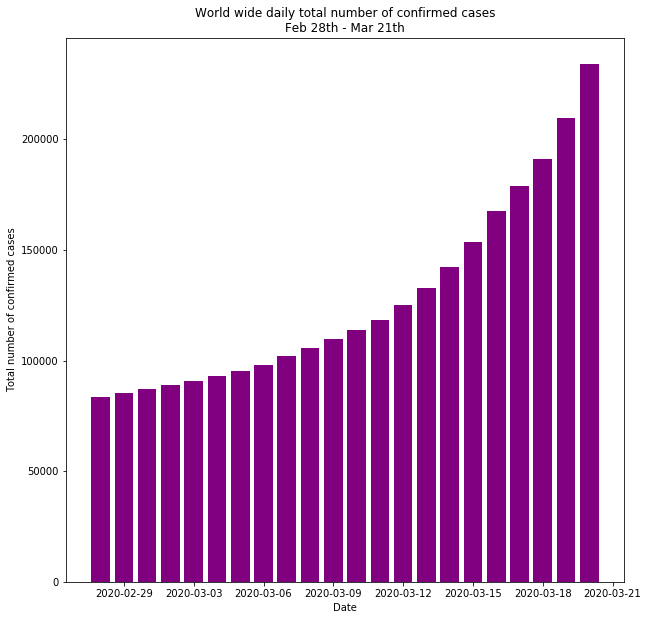

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
# Add x-axis and y-axis
ax.bar(testDataSet.index.values,
       testDataSet['Total number of confirmed cases'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Total number of confirmed cases",
       title="World wide daily total number of confirmed cases\nFeb 28th - Mar 21th")
plt.show()

### Process the training dataset

In [86]:
# Pick the column which we want to analyse from the trainDataSet
totalNumberOfConfirmedCases = trainDataSet.iloc[:, 0:1].values
print (totalNumberOfConfirmedCases)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
totalNumberOfConfirmedCasesScaled = sc.fit_transform(totalNumberOfConfirmedCases)
print (totalNumberOfConfirmedCasesScaled)

[[  282]
 [  314]
 [  581]
 [  846]
 [ 1320]
 [ 2014]
 [ 2798]
 [ 4593]
 [ 6065]
 [ 7818]
 [ 9826]
 [11953]
 [14557]
 [17391]
 [20630]
 [24554]
 [28276]
 [31481]
 [34886]
 [37558]
 [40554]
 [43103]
 [45171]
 [46997]
 [49053]
 [50580]
 [51851]
 [71429]
 [73332]
 [75204]
 [75748]
 [76769]
 [77794]
 [78811]
 [79331]
 [80239]
 [81109]
 [82294]]
[[0.00000000e+00]
 [3.90186802e-04]
 [3.64580793e-03]
 [6.87704238e-03]
 [1.26566844e-02]
 [2.11188607e-02]
 [3.06784373e-02]
 [5.25654782e-02]
 [7.05140711e-02]
 [9.18889919e-02]
 [1.16373214e-01]
 [1.42308443e-01]
 [1.74059894e-01]
 [2.08615812e-01]
 [2.48110033e-01]
 [2.95956689e-01]
 [3.41340292e-01]
 [3.80419939e-01]
 [4.21938253e-01]
 [4.54518851e-01]
 [4.91050090e-01]
 [5.22130908e-01]
 [5.47346730e-01]
 [5.69611764e-01]
 [5.94681266e-01]
 [6.13300493e-01]
 [6.28798225e-01]
 [8.67519387e-01]
 [8.90723309e-01]
 [9.13549237e-01]
 [9.20182412e-01]
 [9.32631810e-01]
 [9.45129981e-01]
 [9.57530605e-01]
 [9.63871141e-01]
 [9.74942691e-01]
 [9.85550

In [87]:
# Define the number of previous timesteps that we want our RNN to look at while predicting for a particular timestep
numberOftimeSteps = 10
# So, basically we want our RNN to look at the previous 10 timesteps, each time it tries to make a prediction for a particular timestep

# Creating a data structure with <numberOftimeSteps> timesteps and 1 output
xTrain = []
yTrain = []
for i in range(numberOftimeSteps, len(totalNumberOfConfirmedCasesScaled)):
    xTrain.append(totalNumberOfConfirmedCasesScaled[i-numberOftimeSteps:i, 0])
    yTrain.append(totalNumberOfConfirmedCasesScaled[i, 0])

# Convert the xTrain, yTrain lists into array format
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

print('Shape of xTrain: ', xTrain.shape)
print('\nxTrain: ', xTrain)

print('\nShape of yTrain', yTrain.shape)
print('\nyTrain: ', yTrain)

Shape of xTrain:  (28, 10)

xTrain:  [[0.00000000e+00 3.90186802e-04 3.64580793e-03 6.87704238e-03
  1.26566844e-02 2.11188607e-02 3.06784373e-02 5.25654782e-02
  7.05140711e-02 9.18889919e-02]
 [3.90186802e-04 3.64580793e-03 6.87704238e-03 1.26566844e-02
  2.11188607e-02 3.06784373e-02 5.25654782e-02 7.05140711e-02
  9.18889919e-02 1.16373214e-01]
 [3.64580793e-03 6.87704238e-03 1.26566844e-02 2.11188607e-02
  3.06784373e-02 5.25654782e-02 7.05140711e-02 9.18889919e-02
  1.16373214e-01 1.42308443e-01]
 [6.87704238e-03 1.26566844e-02 2.11188607e-02 3.06784373e-02
  5.25654782e-02 7.05140711e-02 9.18889919e-02 1.16373214e-01
  1.42308443e-01 1.74059894e-01]
 [1.26566844e-02 2.11188607e-02 3.06784373e-02 5.25654782e-02
  7.05140711e-02 9.18889919e-02 1.16373214e-01 1.42308443e-01
  1.74059894e-01 2.08615812e-01]
 [2.11188607e-02 3.06784373e-02 5.25654782e-02 7.05140711e-02
  9.18889919e-02 1.16373214e-01 1.42308443e-01 1.74059894e-01
  2.08615812e-01 2.48110033e-01]
 [3.06784373e-02 5.25

In [88]:
# Reshaping the xTrain to be able to use it as input for RNN
# Reference: https://keras.io/layers/recurrent/
# Input shape for a RNN - 3D tensor with shape (batch_size, timesteps, input_dim).
# -- batch_size: Total number of records in the training dataset
# -- timesteps: The number of previous timesteps that we want our RNN to look at while predicting for a particular timestep
# -- input_dim: 1
xTrain = np.reshape(xTrain, (xTrain.shape[0], numberOftimeSteps, 1))

### Define the recurrent neural network and train the neural network

In [132]:
numberOfEpochs = 1000
batchSize = 15
dropOutValue = 0.2
numberOfNeuronsInEachLayer = 50
numberOfUnitsInOutputLayer = 1

recurrentNeuralNetwork = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
recurrentNeuralNetwork.add(LSTM(units = numberOfNeuronsInEachLayer, return_sequences = True, input_shape = (xTrain.shape[1], 1)))
recurrentNeuralNetwork.add(Dropout(dropOutValue))

# Adding a second LSTM layer and some Dropout regularisation
recurrentNeuralNetwork.add(LSTM(units = numberOfNeuronsInEachLayer, return_sequences = True))
recurrentNeuralNetwork.add(Dropout(dropOutValue))

# Adding a third LSTM layer and some Dropout regularisation
recurrentNeuralNetwork.add(LSTM(units = numberOfNeuronsInEachLayer, return_sequences = True))
recurrentNeuralNetwork.add(Dropout(dropOutValue))

# Adding a fourth LSTM layer and some Dropout regularisation
recurrentNeuralNetwork.add(LSTM(units = numberOfNeuronsInEachLayer))
recurrentNeuralNetwork.add(Dropout(dropOutValue))

# Adding the output layer
recurrentNeuralNetwork.add(Dense(units = numberOfUnitsInOutputLayer))

# Compiling the RNN
recurrentNeuralNetwork.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
recurrentNeuralNetwork.fit(xTrain, yTrain, epochs = numberOfEpochs, batch_size = batchSize, verbose=1)

Epoch 1/1000
28/28 [==============================] - 2s 64ms/step - loss: 0.4559
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.3945
Epoch 3/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.3241
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1288
Epoch 6/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 8/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 9/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 10/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 11/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 12/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 13/1000
28/28 [===

28/28 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 101/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 102/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 103/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 104/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 105/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 106/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 107/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 108/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 109/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 110/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 111/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 112/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 199/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 200/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 201/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 202/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 203/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 204/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 205/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 206/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 207/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 208/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 209/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 210/1000
28/2

28/28 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 297/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 298/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 299/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 300/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 301/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 302/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 303/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 304/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 305/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 306/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 307/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 308/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 395/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 396/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 397/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 398/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 399/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 400/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 401/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 402/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 403/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 404/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 405/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 406/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 493/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 494/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 495/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 496/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 497/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 498/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 499/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 500/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 501/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 502/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 503/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 504/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 591/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 592/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 593/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 594/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 595/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 596/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 597/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 598/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 599/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 600/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 601/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 602/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 689/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 690/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 691/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 692/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 693/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 694/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 695/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 696/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 697/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 698/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 699/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 700/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 787/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 788/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 789/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 790/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 791/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 792/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 793/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 794/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 795/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 796/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 797/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 798/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 885/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 886/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 887/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 888/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 889/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 890/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 891/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 892/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 893/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 894/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 895/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 896/1000
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 983/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 984/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 985/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 986/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 987/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 988/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 989/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 990/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 991/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 992/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 993/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 994/1000
28/2

In [137]:
### Visualising the results. Compare the predicted trainDataset results with the original data to see how the RNN is performing

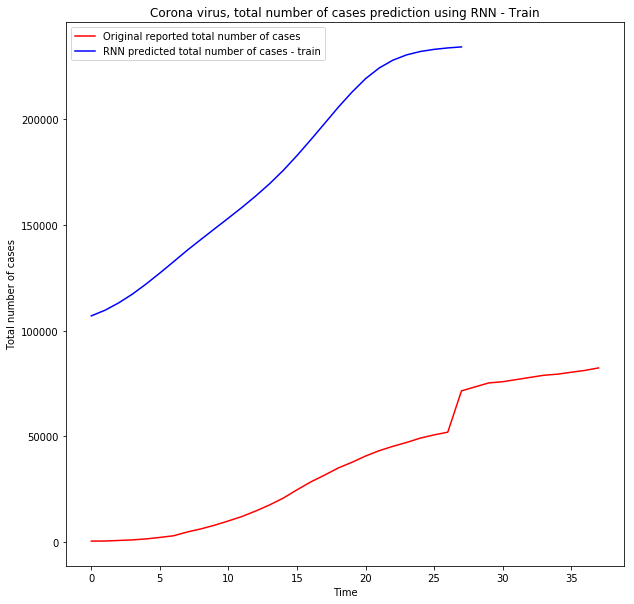

In [136]:
predictedTotalNumberOfCasesTrain = recurrentNeuralNetwork.predict(xTrain)
# Inverse transform the predicted data back to the normal data
predictedTotalNumberOfCasesTrain = sc.inverse_transform(predictedTotalNumberOfCasesTrain)

plt.figure(figsize=(10,10))
plt.plot(totalNumberOfConfirmedCases, color = 'red', label = 'Original reported total number of cases')
plt.plot(predictedTotalNumberOfCasesTrain, color = 'blue', label = 'RNN predicted total number of cases - train')
plt.title('Corona virus, total number of cases prediction using RNN - Train')
plt.xlabel('Time')
plt.ylabel('Total number of cases')
plt.legend()
plt.show()

### Process the testing dataset

In [133]:
# Pick the column which we want to analyse from the testDataSet
totalNumberOfConfirmedCasesTest = testDataSet.iloc[:, 0:1].values
print (totalNumberOfConfirmedCasesTest)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
totalNumberOfConfirmedCasesTestScaled = sc.fit_transform(totalNumberOfConfirmedCasesTest)
print (totalNumberOfConfirmedCasesTestScaled)

[[ 83652]
 [ 85403]
 [ 87137]
 [ 88948]
 [ 90869]
 [ 93091]
 [ 95324]
 [ 98192]
 [101927]
 [105586]
 [109577]
 [113702]
 [118319]
 [125260]
 [132758]
 [142534]
 [153517]
 [167515]
 [179111]
 [191127]
 [209839]
 [234073]]
[[0.        ]
 [0.01164066]
 [0.02316831]
 [0.03520785]
 [0.04797867]
 [0.06275055]
 [0.07759555]
 [0.09666204]
 [0.12149234]
 [0.14581741]
 [0.17234961]
 [0.19977264]
 [0.23046649]
 [0.27661031]
 [0.32645708]
 [0.391448  ]
 [0.46446307]
 [0.55752189]
 [0.63461219]
 [0.71449465]
 [0.83889218]
 [1.        ]]


In [134]:
# Creating a data structure with <numberOftimeSteps> timesteps and 1 output
xTest = []
for i in range(numberOftimeSteps, len(totalNumberOfConfirmedCasesTestScaled)):
    xTest.append(totalNumberOfConfirmedCasesTestScaled[i-numberOftimeSteps:i, 0])

# Convert the xTest list into array format
xTest = np.array(xTest)

print('Shape of xTest: ', xTest.shape)
print('\nxTest: ', xTest)

Shape of xTest:  (12, 10)

xTest:  [[0.         0.01164066 0.02316831 0.03520785 0.04797867 0.06275055
  0.07759555 0.09666204 0.12149234 0.14581741]
 [0.01164066 0.02316831 0.03520785 0.04797867 0.06275055 0.07759555
  0.09666204 0.12149234 0.14581741 0.17234961]
 [0.02316831 0.03520785 0.04797867 0.06275055 0.07759555 0.09666204
  0.12149234 0.14581741 0.17234961 0.19977264]
 [0.03520785 0.04797867 0.06275055 0.07759555 0.09666204 0.12149234
  0.14581741 0.17234961 0.19977264 0.23046649]
 [0.04797867 0.06275055 0.07759555 0.09666204 0.12149234 0.14581741
  0.17234961 0.19977264 0.23046649 0.27661031]
 [0.06275055 0.07759555 0.09666204 0.12149234 0.14581741 0.17234961
  0.19977264 0.23046649 0.27661031 0.32645708]
 [0.07759555 0.09666204 0.12149234 0.14581741 0.17234961 0.19977264
  0.23046649 0.27661031 0.32645708 0.391448  ]
 [0.09666204 0.12149234 0.14581741 0.17234961 0.19977264 0.23046649
  0.27661031 0.32645708 0.391448   0.46446307]
 [0.12149234 0.14581741 0.17234961 0.19977264

In [129]:
# Reshaping the xTest to be able to use it as input for RNN
# Reference: https://keras.io/layers/recurrent/
# Input shape for a RNN - 3D tensor with shape (batch_size, timesteps, input_dim).
# -- batch_size: Total number of records in the training dataset
# -- timesteps: The number of previous timesteps that we want our RNN to look at while predicting for a particular timestep
# -- input_dim: 1
xTest = np.reshape(xTest, (xTest.shape[0], numberOftimeSteps, 1))

### Use the trained RNN model and forecast the totalNumberOfCases the testing dataset

In [130]:
predictedTotalNumberOfCases = recurrentNeuralNetwork.predict(xTest)

# Inverse transform the predicted data back to the normal data
predictedTotalNumberOfCases = sc.inverse_transform(predictedTotalNumberOfCases)

### Visualising the results. Compare the predicted results with the original data to see how the RNN is performing

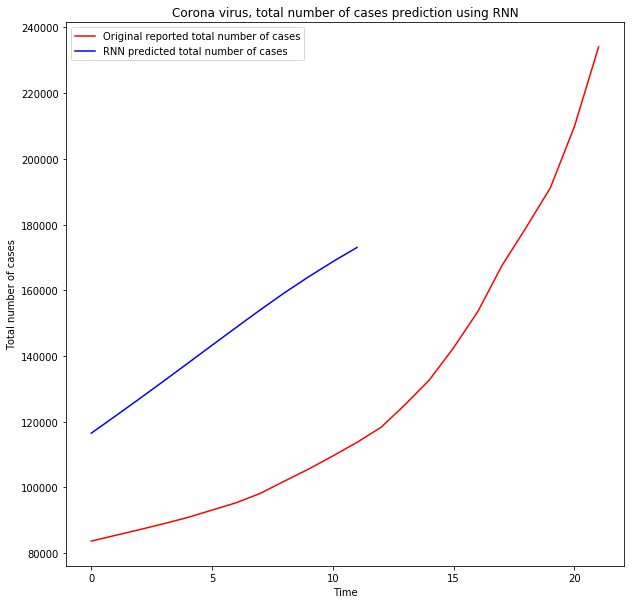

In [131]:
plt.figure(figsize=(10,10))
plt.plot(totalNumberOfConfirmedCasesTest, color = 'red', label = 'Original reported total number of cases')
plt.plot(predictedTotalNumberOfCases, color = 'blue', label = 'RNN predicted total number of cases')
plt.title('Corona virus, total number of cases prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Total number of cases')
plt.legend()
plt.show()

#### References

In [74]:
#https://www.youtube.com/watch?v=zwqwlR48ztQ
#https://github.com/krishnaik06/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ/blob/master/rnn.py